In [1]:
# Load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import itertools

In [2]:
# Get all the cuisines
file_path = '../cuisines_data/cuisines_data_raw.txt'
cuisines_set = set()
with open(file_path, mode='r', encoding='utf-8') as file:
    for line in file:
        cuisines_set.add(line.split(',')[0])
cuisines = list(cuisines_set)
cuisines.sort()
print(cuisines)

# Training / testing data (70% - 30%)
from sklearn.model_selection import train_test_split
with open(file_path, mode='r', encoding='utf-8') as file:
    lines = file.readlines()

# Avoid biases in the data. Make sure there is about the same amount of each cuisine
counts = {}
for cuisine in cuisines:
    counts[cuisine] = 0
for line in lines:
    cuisine = line.split(',')[0]
    counts[cuisine] += 1
print(counts)
biasedCounts = counts


['African', 'EastAsian', 'LatinAmerican', 'MiddleEastern', 'NorthAmerican', 'NorthernEuropean', 'SouthAsian', 'SoutheastAsian', 'SouthernEuropean', 'WesternEuropean']
{'African': 1173, 'EastAsian': 7435, 'LatinAmerican': 11892, 'MiddleEastern': 645, 'NorthAmerican': 45843, 'NorthernEuropean': 739, 'SouthAsian': 3618, 'SoutheastAsian': 3572, 'SouthernEuropean': 14178, 'WesternEuropean': 6774}


In [ ]:

# Creates a Dictionary of all the ingredients used in each cuisine and plots the graph for each cuisine for the raw data
from sklearn.model_selection import train_test_split
with open(file_path, mode='r', encoding='utf-8') as file:
    lines = file.readlines()
cuisinesDict = {}
for cuisine in cuisines:
    cuisinesDict[cuisine] = []
for line in lines:
    for cuisine in cuisines:
        if line.split(", ")[0] == cuisine:
            cuisinesDict[line.split(", ")[0]] += line.strip().split(", ")[1:]
for cuisine in cuisinesDict:
    listName = cuisinesDict[cuisine]
    occurence = {item: listName.count(item) for item in listName}
    occurence = {k: v for k, v in sorted(occurence.items(), key=lambda item: item[1], reverse=True)}
    out = dict(itertools.islice(occurence.items(), 10))
    print(out)
    import matplotlib.pyplot as plt
    biasedCuisines = list(out.keys())
    countsCuisines = list(out.values())
    fig = plt.figure(figsize=(15, 5))
    plt.bar(biasedCuisines, countsCuisines, color = "maroon")
    plt.xlabel("Ingredients")
    plt.ylabel("Counts")
    plt.title("Most Popular " + cuisine + " Ingredients")
    plt.show()

In [3]:

# From counts we see the minimum count is 'MiddleEastern' with 645, so we will pick 600 of each cuisine
# to avoid bias and make sure we have a good amount of each cuisine
lines_unbiased = []
counts = {}
for cuisine in cuisines:
    counts[cuisine] = 0
import random
random.Random(42).shuffle(lines) # seed to make sure we get the same results
for line in lines:
    cuisine = line.split(',')[0]
    if counts[cuisine] < 600:
        lines_unbiased.append(line)
        counts[cuisine] += 1
train_data_raw, test_data_raw = train_test_split(lines_unbiased, test_size=0.3, random_state=42)

In [ ]:
# Creates a Dictionary of all the ingredients used in each cuisine and plots the graph for each cuisine for the training data
numIngredients = {}
cuisinesDict = {}
for cuisine in cuisines:
    cuisinesDict[cuisine] = []
    numIngredients[cuisine] = 0
for line in lines_unbiased:
    for cuisine in cuisines:
        if line.split(", ")[0] == cuisine:
            cuisinesDict[line.split(", ")[0]] += line.strip().split(", ")[1:]
for cuisine in cuisinesDict:
    listName = cuisinesDict[cuisine]
    occurence = {item: listName.count(item) for item in listName}
    occurence = {k: v for k, v in sorted(occurence.items(), key=lambda item: item[1], reverse=True)}
    out = dict(itertools.islice(occurence.items(), 10))
    print(out)
    import matplotlib.pyplot as plt
    numIngredients[cuisine] = len(list(occurence.keys()))
    biasedCuisines = list(out.keys())
    countsCuisines = list(out.values())
    fig = plt.figure(figsize=(15, 5))
    plt.bar(biasedCuisines, countsCuisines, color = "blue")
    plt.xlabel("Ingredients")
    plt.ylabel("Counts")
    plt.title("Most Popular " + cuisine + " Ingredients")
    plt.show()

# Creates a Bar Graph showing the number of ingredients used in each cuisine
biasedIngredients = list(numIngredients.keys())
countsIngredients = list(numIngredients.values())
fig = plt.figure(figsize=(20, 5))
plt.bar(biasedIngredients, countsIngredients, color = "green")
plt.xlabel("Cuisine")
plt.ylabel("Num Ingredients")
plt.title("Num Ingredients used in each cuisine")
plt.show()

In [4]:
# Save training/testing data and target
train_data = []
train_target = []
test_data = []
test_target = []
for line in train_data_raw:
    comma_index = line.index(',')
    target = line[:comma_index]
    values = line[comma_index + 2:]
    if target != '' and values != '':
        train_data.append(values)
        train_target.append(target)
for line in test_data_raw:
    comma_index = line.index(',')
    target = line[:comma_index]
    values = line[comma_index + 1:]
    if target != '' and values != '':
        test_data.append(values)
        test_target.append(target)

# Save to file
with open('../cuisines_data/test_data.txt', mode='w', encoding='utf-8') as file:
    file.writelines(test_data)
with open('../cuisines_data/test_target.txt', mode='w', encoding='utf-8') as file:
    for line in test_target:
        file.write(line + '\n')
with open('../cuisines_data/train_data.txt', mode='w', encoding='utf-8') as file:
    file.writelines(train_data)
with open('../cuisines_data/train_target.txt', mode='w', encoding='utf-8') as file:
    for line in train_target:
        file.write(line + '\n')

# Check lengths are correct
len(train_data), len(test_data), len(train_target), len(test_target)

(4200, 1800, 4200, 1800)

In [ ]:
# Create Bar Graph for Counts of Cuisines
import matplotlib.pyplot as plt
biasedCuisines = list(biasedCounts.keys())
countsCuisines = list(biasedCounts.values())
fig = plt.figure(figsize=(19, 5))
plt.bar(biasedCuisines, countsCuisines, color = "blue")
plt.xlabel("Cuisine")
plt.ylabel("Count Cuisine")
plt.title("Counts of Cuisines")
plt.show()

In [9]:
# Import packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model with the train data
model.fit(train_data, train_target)

# Creating labels for the test data
labels = model.predict(test_data)

Text(110.44999999999997, 0.5, 'predicted cuisine')

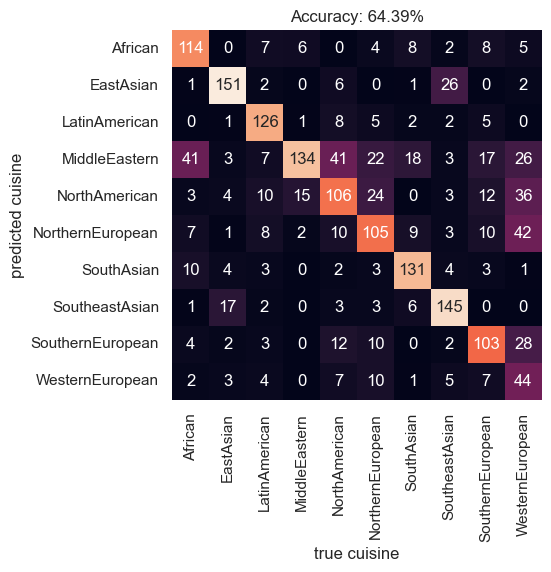

In [10]:
# Create confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=cuisines, yticklabels=cuisines)

# Plotting Heatmap of Confusion Matrix
plt.title('Accuracy: ' + str(round(model.score(test_data, test_target) * 100, 2)) + '%')
plt.xlabel('true cuisine')
plt.ylabel('predicted cuisine')

In [11]:
# Predicting category on new data based on trained model
def predict_category(str, model=model):
    pred = model.predict([str])
    return pred[0]

In [12]:
# Test the model from cleanser.ipynb cleaned recipes
with open('../recipes_data/recipes_filtered.txt', mode='r', encoding='utf-8') as file:
    recipes = file.readlines()

# Test 10 random recipes
import random
for i in range(10):
    recipe = random.choice(recipes)
    print('Recipe: ' + recipe[:-1])
    print('Predicted cuisine: ' + predict_category(recipe))
    print('')

Recipe: TITLE: Oatmeal PB and Banana Smoothie, , INGREDIENTS:, - 1/4 cup rolled oats , - 1 cup coconut milk beverage (such as Silk®) , - 1/2 banana, frozen , - 3 tablespoons powdered peanut butter (such as PB2®) , - 1 tablespoon agave nectar , , INSTRUCTIONS:, - Place oats in a blender and blend until a fine powder forms; add coconut milk beverage, banana, powdered peanut butter, and agave nectar. Blend until smooth., 
Predicted cuisine: SouthAsian

Recipe: TITLE: Grilled Romaine, , INGREDIENTS:, - 1 tablespoon olive oil , - 1 head romaine lettuce, cut in half lengthwise , - 1 tablespoon steak seasoning , - 1 lemon, juiced , , INSTRUCTIONS:, - Preheat grill for medium heat and lightly oil the grate. Drizzle olive oil over romaine lettuce and season with steak seasoning., - Place lettuce cut side-down on preheated grill. Cook until lettuce is slightly wilted and charred, about 5 minutes. Drizzle with lemon juice to serve., 
Predicted cuisine: LatinAmerican

Recipe: TITLE: Zucchini Casse